In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Calling Data

In [26]:
df = pd.read_csv('/Users/mac/Desktop/UAE Population.csv')
df.columns

Index(['Emirates_EN', 'Emirates_AR', 'Nationality_EN', 'Nationality_AR',
       'sex_EN', 'sex_AR ', 'year ', 'value '],
      dtype='object')

In [27]:
df.columns

Index(['Emirates_EN', 'Emirates_AR', 'Nationality_EN', 'Nationality_AR',
       'sex_EN', 'sex_AR ', 'year ', 'value '],
      dtype='object')

# Data Cleaning

Here I have called the csv from the specific directory. Now I will be cleaning the data.

In [28]:
#there were issues with the names of these two columns so I had to rename them.
df.rename(columns={'year ':'year', 'value ': 'value', 'sex_AR ':'sex_AR', 
                   'sex_EN':'gender', 'Emirates_EN':'Emirates', 'Nationality_EN':'Nationality'}, inplace=True)

Now I have the dataframe which has been cleaned and the columns are renamed according to my convinience

In [29]:
"""here I observed that the values inside the column df.values were in string format
so I had to change them to integers and now I will create a new column which will have 
all of the integer values stored in it"""


int_list = []
for i in df.value:
    x = int(i)
    int_list.append(x)


In [30]:
x = pd.Series(int_list)
df['values'] = x
df.drop(['value'], axis=1)

type(x.iloc[9]) #checking if the elements have been converted into integers

numpy.int64

In [31]:
#Now I will be removing the unneccessary columns because we already have them in the English charachters we dont need them in arabic
df2 = df.drop(['Emirates_AR', 'Nationality_AR', 'sex_AR','value'], axis=1)
df2.head()

,Emirates,Nationality,gender,year,values
0,Abu Dhabi,National,Male,1975,29200
1,Dubai,National,Male,1975,26100
2,Al Sharjah,National,Male,1975,21300
3,Ajman,National,Male,1975,3930
4,Umm Al - Quwain,National,Male,1975,2300


# Data Analysis Using Multiple Conditions and Statistical Methods

What is the average population of expats in UAE between the year 1975 and 1995?

In [32]:
df3 = df2.copy()
df3 = df3[(df3['year'] <= 1995) & (df3['Nationality'] == 'Non-National')]
df3.head() #this is the filtered dataframe, now I would be taking the average of the population

,Emirates,Nationality,gender,year,values
14,Abu Dhabi,Non-National,Male,1975,126000
15,Dubai,Non-National,Male,1975,103000
16,Al Sharjah,Non-National,Male,1975,29900
17,Ajman,Non-National,Male,1975,6590
18,Umm Al - Quwain,Non-National,Male,1975,1960


In [33]:
#To know about the average population we will have to take average of the population.
avg_population = np.mean(df['values'])
print('The average population in UAE from 1975 to 1995 is :',avg_population)

The average population in UAE from 1975 to 1995 is : 67833.55714285714


# Data Analysis Using Sorting Techniques

Here the data will be sorted in ascending or descending order

In [34]:
df4 = df2[df2['Emirates'] == 'Ajman']
df4 = df4.sort_values(by=['values'], ascending=False)
df4.head()

,Emirates,Nationality,gender,year,values
129,Ajman,Non-National,Male,2005,112000
101,Ajman,Non-National,Male,1995,58000
136,Ajman,Non-National,female,2005,56200
108,Ajman,Non-National,female,1995,34700
73,Ajman,Non-National,Male,1985,23000


In [35]:
print('The year with most number of expats was:', df4.year.iloc[0])

The year with most number of expats was: 2005


# Data Analysis Using Combination of Techniques

In which year the maximum male population of expats was observed in UAE?

In [36]:
df5 = df2[(df2['Nationality'] == 'Non-National') & (df2['gender'] == 'Male')]

In [37]:
df.Emirates.unique()

array(['Abu Dhabi', 'Dubai', 'Al Sharjah', 'Ajman', 'Umm Al - Quwain',
       'Ras Al Khaima', 'Al Fujairah'], dtype=object)

In [38]:
#max expats in Ajman
ajman = df5[df5['Emirates'] == 'Ajman'].sort_values(by='values', ascending=False)
print(ajman['year'].iloc[ajman['values'].argmax()])

2005


In [39]:
#max expats in Dubai
Dubai = df5[df5['Emirates'] == 'Dubai'].sort_values(by='values', ascending=False)
print(Dubai['year'].iloc[Dubai['values'].argmax()])

2005


In [40]:
#max expats in Al Sharjah
sharjah = df5[df5['Emirates'] == 'Al Sharjah'].sort_values(by='values', ascending=False)
print(sharjah['year'].iloc[sharjah['values'].argmax()])

2005


In [41]:
#max expats in Abu Dhabi
abudhabi = df5[df5['Emirates'] == 'Abu Dhabi'].sort_values(by='values', ascending=False)
print(abudhabi['year'].iloc[abudhabi['values'].argmax()])

2005


In [42]:
#max expats in Umm Al - Quwain'
quwain = df5[df5['Emirates'] == 'Umm Al - Quwain'].sort_values(by='values', ascending=False)
print(quwain['year'].iloc[quwain['values'].argmax()])

2005


In [43]:
#max expats in Ras Al Khaima
kahima = df5[df5['Emirates'] == 'Ras Al Khaima'].sort_values(by='values', ascending=False)
print(kahima['year'].iloc[kahima['values'].argmax()])

2005


In [44]:
#max expats in Al Fujairah
fajirah = df5[df5['Emirates'] == 'Al Fujairah'].sort_values(by='values', ascending=False)
print(fajirah['year'].iloc[fajirah['values'].argmax()])

2005


Conclusion:
Here we have seen that all of the states in UAE have had the maximum number of expats in the year 2005

# Data Analysis With Groupby

Find the average population of National of both genders in all of the Emirates

In [45]:
df6 = df2.copy()
df6 = df6.drop(columns=['year'])
df6 = df6[df6['Nationality'] == 'National']

In [46]:
df6.groupby(['gender']).mean()

,values
gender,
Male,33492.571429
female,32221.714286


# Data Visualisation

In [47]:
df.year.unique()

array([1975, 1980, 1985, 1995, 2005])

In [48]:
p_1975 = df2[df2.year == 1975]['values'].mean()
p_1980 = df2[df2.year == 1980]['values'].mean()
p_1985 = df2[df2.year == 1985]['values'].mean()
p_1995 = df2[df2.year == 1995]['values'].mean()
p_2005 = df2[df2.year == 2005]['values'].mean()

Text(0, 0.5, 'avg_population')

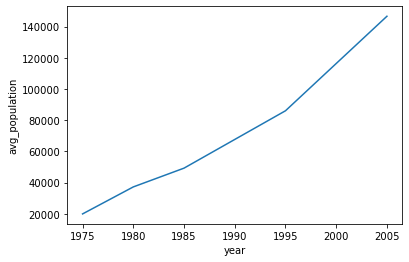

In [49]:
y = [p_1975, p_1980, p_1985, p_1995, p_2005]
x = [1975, 1980, 1985, 1995, 2005]


plt.plot(x,y)
plt.xlabel('year')
plt.ylabel('avg_population')

Here we can see that the average population has been increased in UAE with the passage of time

<AxesSubplot:xlabel='Nationality', ylabel='count'>

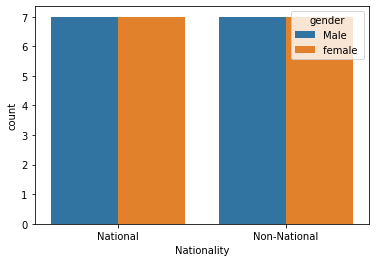

In [50]:
pop_2K5 = df2[df2["year"] == 2005]
import seaborn as sns
sns.countplot(x='Nationality', hue='gender', data=pop_2K5)

Overall population of UAE

Find the population in UAE with respect to each state

In [51]:
pop_80 = df2[df2["year"] == 1980] #% population of each state in 1980

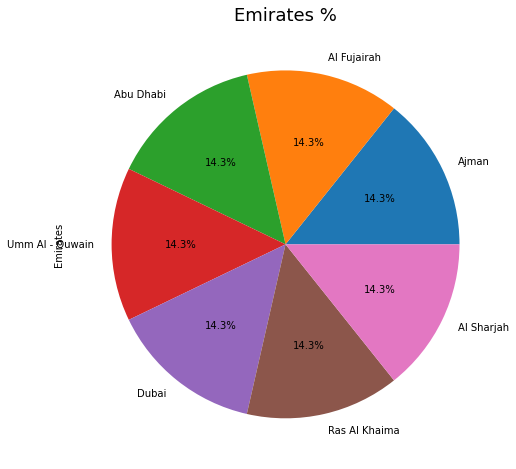

In [52]:
pop_80["Emirates"].value_counts()[:10].plot.pie(figsize=(12,8),autopct="%1.1f%%")
plt.title("Emirates %",fontsize=18)
plt.show()

In [53]:
pop_80.value_counts

<bound method DataFrame.value_counts of            Emirates   Nationality   gender  year  values
28        Abu Dhabi      National     Male  1980   48000
29            Dubai      National     Male  1980   32200
30       Al Sharjah      National     Male  1980   30900
31            Ajman      National     Male  1980    6870
32  Umm Al - Quwain      National     Male  1980    2960
33    Ras Al Khaima      National     Male  1980   20100
34      Al Fujairah      National     Male  1980    9480
35        Abu Dhabi      National  female   1980   42800
36            Dubai      National  female   1980   30300
37       Al Sharjah      National  female   1980   29600
38            Ajman      National  female   1980    6510
39  Umm Al - Quwain      National  female   1980    2890
40    Ras Al Khaima      National  female   1980   19000
41      Al Fujairah      National  female   1980    8890
42        Abu Dhabi  Non-National     Male  1980  284000
43            Dubai  Non-National     Male  1980

In [54]:
pop_05 = df2[df2["year"] == 2005] # % population of each state in 2005

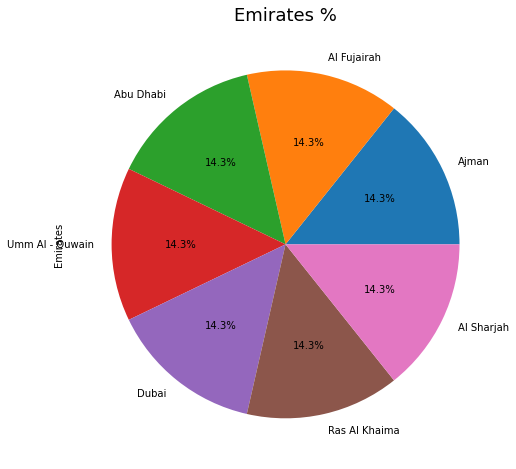

In [55]:
pop_05["Emirates"].value_counts()[:10].plot.pie(figsize=(12,8),autopct="%1.1f%%")
plt.title("Emirates %",fontsize=18)
plt.show()